In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [ ]:
df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.drop_duplicates(inplace=True)

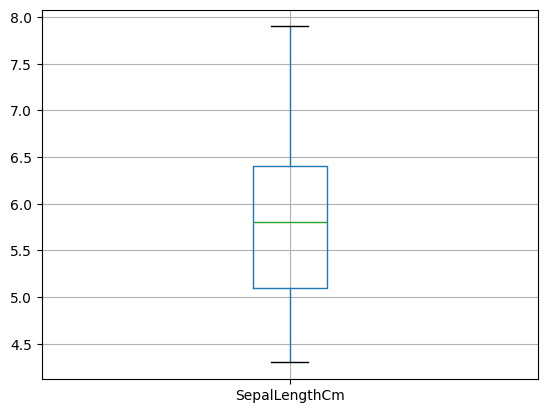

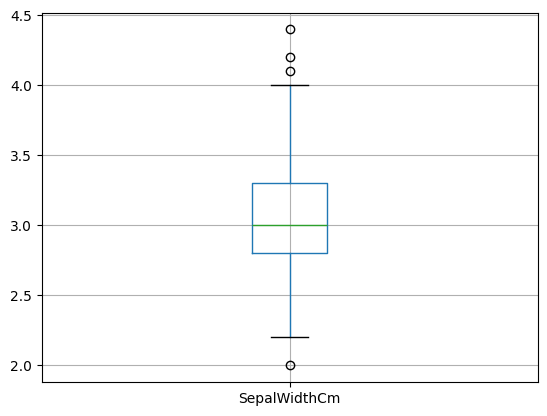

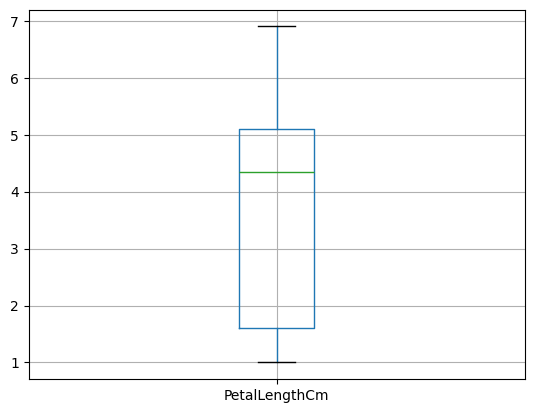

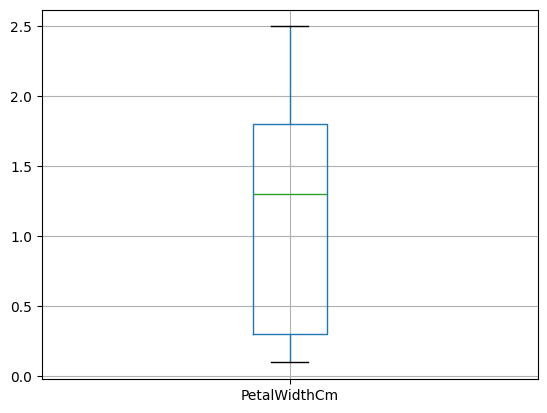

In [ ]:
for col in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]:
    df.boxplot(col)
    plt.show()

In [ ]:
scaler = StandardScaler()
cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"]) # type: ignore

In [ ]:
X = df.drop(columns=["Id", "Species"])
y = df["Species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

In [ ]:
for model_name, model in models.items():
    
    # Train each model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.933
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix for Logistic Regression:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
--------------------------------------------------
Decision Tree Accuracy: 0.900
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [100, 1000, 2500]
}

In [ ]:
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. A

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 1000, ...], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Accuracy for Logistic Regression:", grid_search.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy for Logistic Regression: 0.9666666666666668


In [ ]:
best_logistic_model = grid_search.best_estimator_
best_logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_logistic = best_logistic_model.predict(X_test)

In [ ]:
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logistic):.3f}")
print("Classification Report for Best Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix for Best Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))

Best Logistic Regression Accuracy: 1.000
Classification Report for Best Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix for Best Logistic Regression:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [ ]:
with open("best_logistic_model.pkl", "wb") as f:
    pickle.dump(best_logistic_model, f)